<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [140]:
# Import the data

from tensorflow.keras.datasets import boston_housing
from tensorflow import keras
import numpy as np

np.random.seed(666)

# Separate into train/test
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [141]:
# Target is a continuous variable
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [142]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [125]:
# Normalize the data (numeric-non-binary)
X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)

In [126]:
# Import Models and Layers needed for Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

In [127]:
print(X_train[0].shape, y_train[0].shape)

(13,) ()


In [128]:
model = Sequential()
model.add(Dense(26, input_shape=(13,), activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(1, activation='relu'))

In [129]:
model.compile(loss='mae', optimizer='adam')

In [130]:
# Fit the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 662us/sample - loss: 22.0893 - val_loss: 22.5738
Epoch 2/50
404/404 [==============================] - 0s 116us/sample - loss: 21.7106 - val_loss: 22.1549
Epoch 3/50
404/404 [==============================] - 0s 104us/sample - loss: 21.2357 - val_loss: 21.5956
Epoch 4/50
404/404 [==============================] - 0s 92us/sample - loss: 20.5816 - val_loss: 20.8143
Epoch 5/50
404/404 [==============================] - 0s 99us/sample - loss: 19.6837 - val_loss: 19.7577
Epoch 6/50
404/404 [==============================] - 0s 104us/sample - loss: 18.4575 - val_loss: 18.3066
Epoch 7/50
404/404 [==============================] - 0s 101us/sample - loss: 16.8062 - val_loss: 16.3937
Epoch 8/50
404/404 [==============================] - 0s 89us/sample - loss: 14.6633 - val_loss: 14.0638
Epoch 9/50
404/404 [==============================] - 0s 87us/sample - loss: 12.0137 - val_loss: 11.3754
Epoc

In [131]:
help(history.history)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg

In [132]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


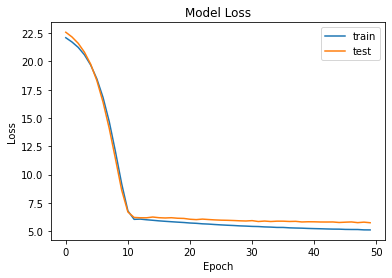

In [133]:
# Plotting Loss by Epoch

# The plot seems to taper off around the 10th Epoch

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [272]:
np.random.seed(1)

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
y_pred = lr.predict(X_test)

In [274]:
print(f'MAE of Boston Dataset using Sklearn LinearRegression: {mse(y_test, y_pred)}')

MAE of Boston Dataset using Sklearn LinearRegression: 23.195599256423087


In [277]:
# Try to rectify the former model

from tensorflow.keras.layers import Flatten

np.random.seed(111)

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

model = Sequential([
    Flatten(),
    Dense(13, input_shape=(13,), activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train,
          epochs=25, validation_data=(X_test, y_test)
)

Train on 404 samples, validate on 102 samples
Epoch 1/25
404/404 [==============================] - 0s 647us/sample - loss: 602.4592 - val_loss: 627.7510
Epoch 2/25
404/404 [==============================] - 0s 94us/sample - loss: 593.9976 - val_loss: 619.2090
Epoch 3/25
404/404 [==============================] - 0s 92us/sample - loss: 586.2552 - val_loss: 612.1987
Epoch 4/25
404/404 [==============================] - 0s 92us/sample - loss: 580.0842 - val_loss: 606.6415
Epoch 5/25
404/404 [==============================] - 0s 92us/sample - loss: 575.3247 - val_loss: 602.3645
Epoch 6/25
404/404 [==============================] - 0s 109us/sample - loss: 571.5177 - val_loss: 598.5542
Epoch 7/25
404/404 [==============================] - 0s 97us/sample - loss: 567.4495 - val_loss: 593.7241
Epoch 8/25
404/404 [==============================] - 0s 92us/sample - loss: 562.2627 - val_loss: 587.4487
Epoch 9/25
404/404 [==============================] - 0s 87us/sample - loss: 555.5022 - val_loss

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.